In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
import tensorflow.keras as Keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# for downloading dataset
import opendatasets as od

In [3]:
def buildModel(inputUnit, hiddenUnit1, hiddenUnit2, noOfClasses):

    inputLayer = Input(shape=(inputUnit,))
    hiddenLayer1 = Dense(hiddenUnit1, activation='relu')(inputLayer)
    hiddenLayer2 = Dense(hiddenUnit2, activation='relu')(hiddenLayer1)
    outputLayer = Dense(noOfClasses, activation='softmax')(hiddenLayer2)

    model = Keras.Model(
        inputs=[inputLayer],
        outputs=[outputLayer]
    )
    
    return model

In [4]:
url = 'https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv';
urlDataset = od.download(url)

Skipping, found downloaded files in ".\digit-recognizer" (use force=True to force download)


In [5]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [6]:
# process the data
x = data.iloc[:, 1:]
print(x.shape)

x = x/255
y = data.iloc[:, 0]
print(y.shape)

print("Data Processed")

(42000, 784)
(42000,)
Data Processed


In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

print(Xtrain.shape,' -> ',ytrain.shape)
print(Xtest.shape,' -> ',ytest.shape)

(33600, 784)  ->  (33600,)
(8400, 784)  ->  (8400,)


In [8]:
lr = 0.01

# build DNN model
model = buildModel(784, 14, 14, 10)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer= Adam(learning_rate=lr))
print("Model Built and compiled")

# train the model
trainingResult = model.fit(x=Xtrain, y=ytrain, epochs=10)
print("Training completed")

Model Built and compiled
Epoch 1/10
1050/1050 [==============================] - 2s 1ms/step - loss: 0.4200 - accuracy: 0.8737: 1s - loss: 0.7623 - accuracy: 0.76 - ETA: 1s - loss: 0.7129 - accu - ETA: 0s -
Epoch 2/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2786 - accuracy: 0.9171: 0s - loss: 0.2786 - accuracy
Epoch 3/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2517 - accuracy: 0.9247
Epoch 4/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2366 - accuracy: 0.9316
Epoch 5/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2252 - accuracy: 0.9341
Epoch 6/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2223 - accuracy: 0.9346
Epoch 7/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2077 - accuracy: 0.9389
Epoch 8/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2057 - accuracy: 0.9400
Epoch 9/10
1050/1050 [===========================

In [9]:
# evaludate the model
validationResult = model.evaluate(x=Xtest, y=ytest)

263/263 [==============================] - 1s 1ms/step - loss: 0.2418 - accuracy: 0.9314


AttributeError: 'list' object has no attribute 'history'

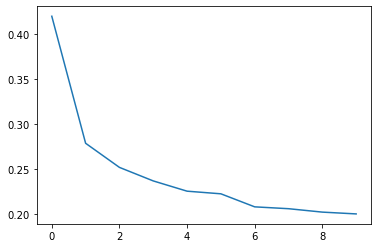

In [10]:
# Visulaization the training and validation loss
plt.plot(trainingResult.history['loss'], label='TrainingLoss')
plt.plot(validationResult.history['loss'], label='ValidationLoss')
plt.show()

In [11]:
# save the model
filename = "../../Server/Model/digit_recognition"
model.save(filename)
print("Model Saved")

# load the model
savedPickleModel = Keras.models.load_model(filename)
print("Model loaded")
savedPickleModel.evaluate(x=Xtest, y=ytest)

INFO:tensorflow:Assets written to: ../../Server/Model/digit_recognition\assets
Model Saved
Model loaded
263/263 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.9314


[0.2417830526828766, 0.9314285516738892]